# Modelado Inverso de ERT

## Caso de Estudio 2

In [102]:
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [103]:
data = ert.load('datos_tre/Datos_reales_2.txt')
print(data)

Data: Sensors: 81 data: 944, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


In [104]:
data["k"] = ert.geometricFactors(data)
data["rhoa"] = data("k") * data("r")
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)

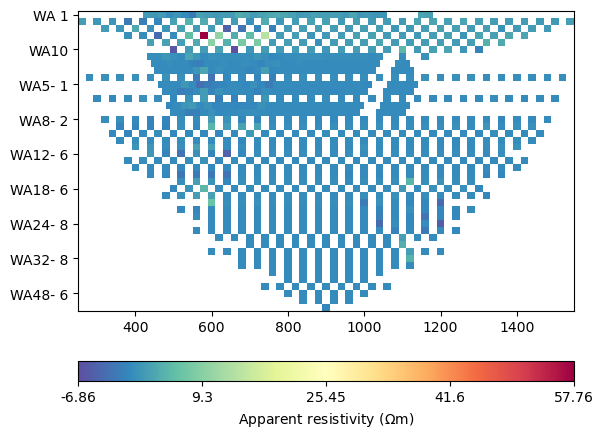

In [105]:
ax, cb = ert.show(data)

In [106]:
mgr =ert.ERTManager(data, verbose=True)
inv = mgr.invert(verbose=True) # El error es por los valores negativos de la pseudoseccion

21/02/24 - 17:41:27 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 17:41:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 17:41:27 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 17:41:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 17:41:27 - pyGIMLi - WARNING - Found negative apparent resistivities. These can't be processed with logarithmic data transformation. You should consider to filter them out using data.remove(data['rhoa'] < 0).
21/02/24 - 17:41:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/24 - 17:41:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/02/24 - 17:41:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
21/02/24 - 17:41:27 - pyGIMLi - INFO - Use median(data values)=0.08074081615284985
21/02/24 - 17:41:27 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.

fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000175D1B391D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000175E3464450>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000175D1B39270>
min/max (data): -6.86/57.76
min/max (error): 2%/6.9%
min/max (start model): 0.08/0.08
--------------------------------------------------------------------------------


RuntimeError: ./core/src/inversion.cpp:95		double GIMLI::RInversion::getPhiD(const Vec&) const  getPhiD == nan

### QA/QC

<Axes: ylabel='Count'>

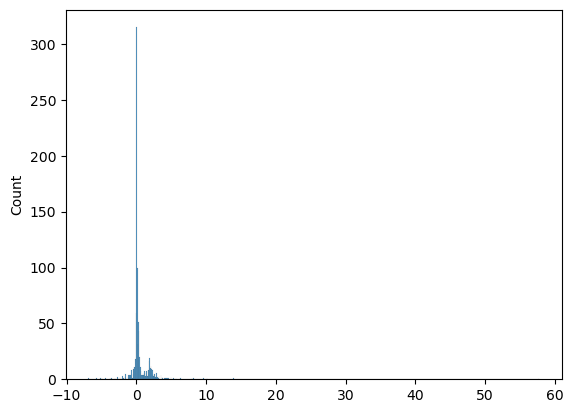

In [ ]:
sns.histplot(data["rhoa"])

In [ ]:
data.remove(data["rhoa"]<0)

<Axes: ylabel='Count'>

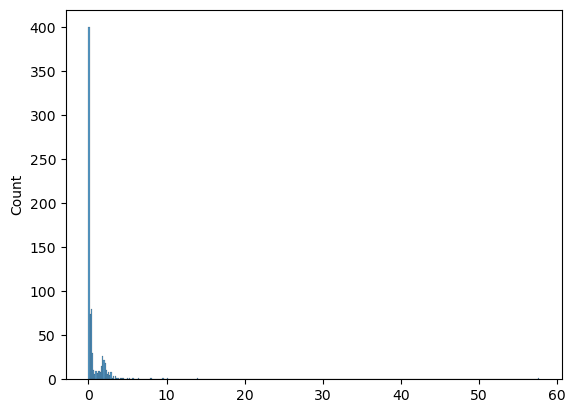

In [ ]:
sns.histplot(data["rhoa"])

In [ ]:
data_array = np.array(data["rhoa"])
data_series = pd.Series(data_array)
quantile_90 = data_series.quantile(0.90)

quantile_90

2.0994253367743196

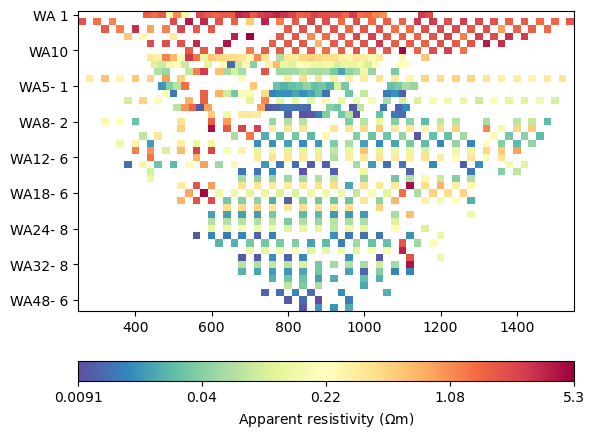

In [ ]:
ax, cb = ert.show(data)

In [ ]:
#data.remove(data["rhoa"]>quantile_99)

## Intento de Inversion 1

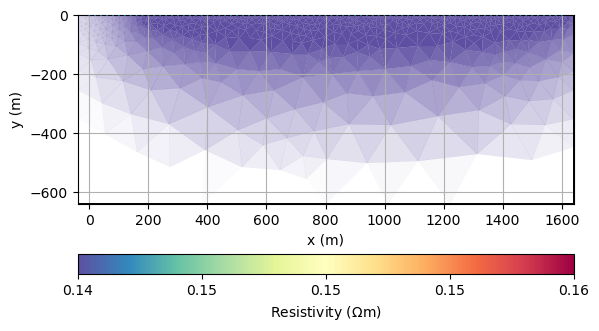

In [ ]:
mgr = ert.ERTManager(data, verbose=True)
inv = mgr.invert(verbose=True)
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
#ax.set_ylim([-10, ax.get_ylim()[1]]) #esto es para que el eje y empiece en -10

### Mas QA/QC

<Axes: ylabel='Count'>

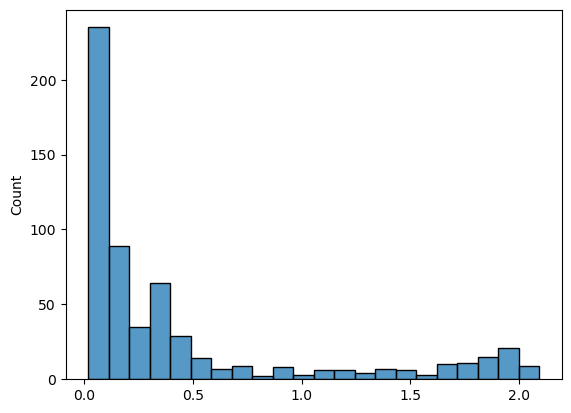

In [107]:
quantile_10 = data_series.quantile(0.10) 
data.remove(data["rhoa"]<quantile_10)
data.remove(data["rhoa"]>quantile_90)
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteError=5e-6)
sns.histplot(data["rhoa"])

In [113]:
mgr = ert.ERTManager(data, verbose=True)
inv = mgr.invert(verbose=True, lam = 20)


21/02/24 - 17:46:15 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 17:46:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 17:46:15 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 17:46:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 17:46:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/24 - 17:46:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/02/24 - 17:46:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3412 Cells: 6412 Boundaries: 5014
21/02/24 - 17:46:15 - pyGIMLi - INFO - Use median(data values)=0.1576945470815523
21/02/24 - 17:46:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1275, min/max=0.157695/0.157695
21/02/24 - 17:46:15 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000175E22598B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000175F2318590>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000175E2259D60>
min/max (data): 0.02/2.09
min/max (error): 2%/2.03%
min/max (start model): 0.16/0.16
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 4833.20
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 4671.67 (dPhi = 3.33%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 4503.73 (dPhi = 3.56%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 4363.41 (dPhi = 3.06%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 4214.79 (dPhi = 3.31%) lam: 20.0
-----------------

(-250.0, 0.0)

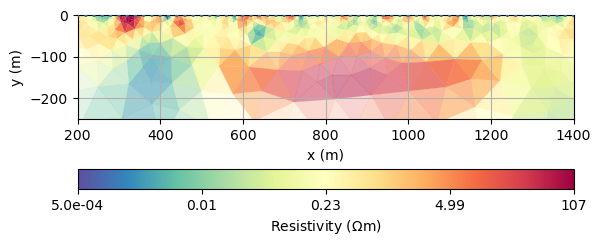

In [114]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0) #cMin y cMax son los valores mínimos y máximos de la barra de colores
ax, cb = mgr.showResult(**kw)
ax.grid(True)
ax.set_xlim([200, 1400])
ax.set_ylim([-250, ax.get_ylim()[1]]) #esto es para que el eje y empiece en -10

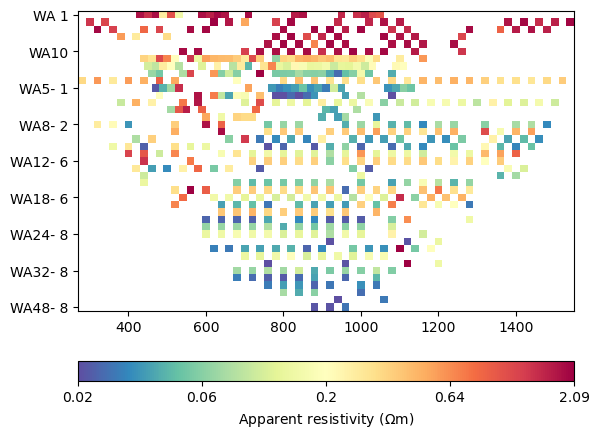

In [ ]:
ax, cb = ert.show(data)